### Logistic Regression on Binary Classification Task

In [298]:
import pandas as pd

df = pd.read_csv(
    'C:/Users/Zirito/PycharmProjects/Learn Machine Learning/SMSSpamCollection',
    sep = '\t', header = None, names = ['label', 'sms']
)
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [299]:
df['label'].value_counts() # unbalance dataset

ham     4825
spam     747
Name: label, dtype: int64

In [300]:
from sklearn.preprocessing import LabelBinarizer

X = df['sms'].values
y = df['label'].values

lb = LabelBinarizer()
y = lb.fit_transform(y).ravel() # flatten or ravel
y

array([0, 0, 1, ..., 0, 0, 0])

In [301]:
lb.classes_

array(['ham', 'spam'], dtype='<U4')

In [302]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [303]:
print(X_train,'\n')
print(y_train)

['Its going good...no problem..but still need little experience to understand american customer voice...'
 'U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd. Cust care 07821230901'
 'Ok...' ...
 "For ur chance to win a £250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk"
 'R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO 2 MY HOUSE'
 'Mm feeling sleepy. today itself i shall get that dear'] 

[0 1 0 ... 1 0 0]


In [308]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(X_test_tfidf)

  (0, 7241)	0.11253343579528907
  (0, 7185)	0.19273340016375756
  (0, 7035)	0.14502188177850334
  (0, 6392)	0.19273340016375756
  (0, 6144)	0.19273340016375756
  (0, 5597)	0.11346900297119587
  (0, 5279)	0.1338971667568563
  (0, 4885)	0.19273340016375756
  (0, 4861)	0.13235901120234608
  (0, 4358)	0.11021504619906546
  (0, 4328)	0.1723052363780971
  (0, 4168)	0.1723052363780971
  (0, 4117)	0.19273340016375756
  (0, 3880)	0.17728009081609514
  (0, 3748)	0.30945408508306665
  (0, 3520)	0.19273340016375756
  (0, 3209)	0.3993444791659462
  (0, 3042)	0.19273340016375756
  (0, 2969)	0.3854668003275151
  (0, 2968)	0.2785474663877418
  (0, 2047)	0.13162798135796386
  (0, 1445)	0.13828270725115407
  (0, 514)	0.19273340016375756
  (1, 6939)	0.41069408806529517
  (1, 6795)	0.3817566050924978
  :	:
  (1390, 6774)	0.2567848547419996
  (1390, 6457)	0.2993348249320414
  (1390, 6404)	0.30797732015483786
  (1390, 5981)	0.17857459228707248
  (1390, 5400)	0.292273392171272
  (1390, 5394)	0.18178911709262

In [309]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

for pred,sms in zip(y_pred[:5], X_test[:5]):
    print(f'PRED {pred} - SMS {sms} \n')

PRED 0 - SMS Storming msg: Wen u lift d phne, u say "HELLO" Do u knw wt is d real meaning of HELLO?? . . . It's d name of a girl..! . . . Yes.. And u knw who is dat girl?? "Margaret Hello" She is d girlfrnd f Grahmbell who invnted telphone... . . . . Moral:One can 4get d name of a person, bt not his girlfrnd... G o o d n i g h t . . .@ 

PRED 0 - SMS <Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you. 

PRED 0 - SMS And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed 

PRED 0 - SMS Sir Goodmorning, Once free call me. 

PRED 0 - SMS All will come alive.better correct any good looking figure there itself.. 



In [310]:
# Evaluation in binary classification:
# Confusion matrix, accuracy, precision & recall, f1 score, ROC

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[1207,    1],
       [  48,  137]], dtype=int64)

In [312]:
tn, fp, fn, tp = matrix.ravel()
print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')

TN: 1207
FP: 1
FN: 48
TP: 137


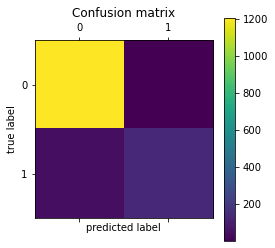

In [315]:
import matplotlib.pyplot as plt

plt.matshow(matrix)
plt.colorbar()
plt.title('Confusion matrix')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [319]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred)) #positive predicted value
print(recall_score(y_test, y_pred)) #true positive rate
print(f1_score(y_test, y_pred)) #harmonic mean from precision and recall

0.964824120603015
0.9927536231884058
0.7405405405405405
0.8482972136222909


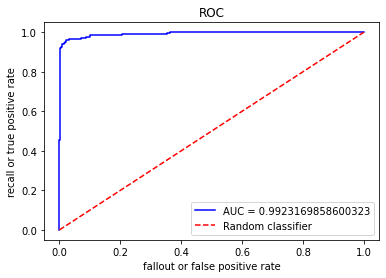

In [321]:
# ROC: Receiver Operating Characteristic

from sklearn.metrics import roc_curve, auc

prob_estimate = model.predict_proba(X_test_tfidf)

fpr, tpr, threshold = roc_curve(y_test, prob_estimate[:,1])
nilai_auc = auc(fpr,tpr)
nilai_auc

plt.plot(fpr, tpr, 'b', label = f'AUC = {nilai_auc}')
plt.plot([0,1],[0,1], 'r--', label = 'Random classifier')

plt.title('ROC')
plt.xlabel('fallout or false positive rate')
plt.ylabel('recall or true positive rate')
plt.legend()
plt.show()